### Coffee Sales

* Import Necessary Libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# importing the zipfile module 
from zipfile import ZipFile
# loading the temp.zip and creating a zip object 
with ZipFile("Coffee Sales.zip", 'r') as zObject:
     # Extracting all the members of the zip  
    # into a specific location. 
    zObject.extractall( 
        path="D:/ / /Projects/Coffee Sales Project/")

* Load the Dataset

In [3]:
df = pd.read_csv("Coffee Sales Project/index.csv")

* Quick Data Overview

In [4]:
df.head()  # Check first few rows

,date,datetime,cash_type,card,money,coffee_name
0,2024-03-01,2024-03-01 10:15:50.520,card,ANON-0000-0000-0001,38.7,Latte
1,2024-03-01,2024-03-01 12:19:22.539,card,ANON-0000-0000-0002,38.7,Hot Chocolate
2,2024-03-01,2024-03-01 12:20:18.089,card,ANON-0000-0000-0002,38.7,Hot Chocolate
3,2024-03-01,2024-03-01 13:46:33.006,card,ANON-0000-0000-0003,28.9,Americano
4,2024-03-01,2024-03-01 13:48:14.626,card,ANON-0000-0000-0004,38.7,Latte


In [5]:
df.info()  # Check data types and missing values

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3071 entries, 0 to 3070
Data columns (total 6 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   date         3071 non-null   object 
 1   datetime     3071 non-null   object 
 2   cash_type    3071 non-null   object 
 3   card         2982 non-null   object 
 4   money        3071 non-null   float64
 5   coffee_name  3071 non-null   object 
dtypes: float64(1), object(5)
memory usage: 144.1+ KB


In [6]:
df.describe()  # Summary statistics

,money
count,3071.000000
mean,31.852582
std,4.944265
min,18.120000
25%,27.920000
50%,32.820000
75%,35.760000
max,40.000000


In [7]:
df['date'] = pd.to_datetime(df['date'])  # Convert date column

In [8]:
# Convert to DateTime format
df['time'] = pd.to_datetime(df['datetime']).dt.strftime('%H:%M:%S')
df=df.drop(columns='datetime')

In [9]:
df.head(5)

,date,cash_type,card,money,coffee_name,time
0,2024-03-01,card,ANON-0000-0000-0001,38.7,Latte,10:15:50
1,2024-03-01,card,ANON-0000-0000-0002,38.7,Hot Chocolate,12:19:22
2,2024-03-01,card,ANON-0000-0000-0002,38.7,Hot Chocolate,12:20:18
3,2024-03-01,card,ANON-0000-0000-0003,28.9,Americano,13:46:33
4,2024-03-01,card,ANON-0000-0000-0004,38.7,Latte,13:48:14


In [10]:
df.duplicated().sum()  # Count duplicate rows

0

* **Start Exploratory Data Analysis (EDA)**

**Total Sales Per Day and monthly data**

<Axes: title={'center': 'Daily Sales Trend'}, xlabel='date'>

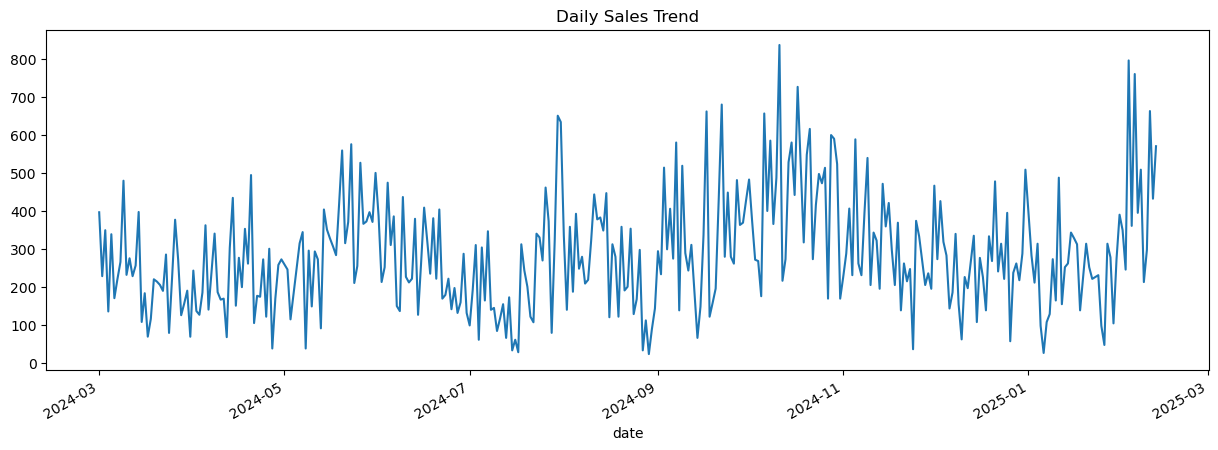

In [11]:
# Total Sales Per Day throughout the year
plt.figure(figsize=(15,5))
df.groupby('date')['money'].sum().plot(kind='line', title="Daily Sales Trend")

* **To calculate monthly sales data**

In [12]:
# to group sales data by month and year
df['year_month'] = df['date'].dt.to_period('M')  # Creates "YYYY-MM" format

In [13]:
# sum up the sales (money column) per month
monthly_sales = df.groupby('year_month')['money'].sum().reset_index()
print(monthly_sales)

   year_month     money
0     2024-03   7050.20
1     2024-04   6720.56
2     2024-05   9063.42
3     2024-06   7758.76
4     2024-07   6915.94
5     2024-08   7613.84
6     2024-09   9988.64
7     2024-10  13891.16
8     2024-11   8590.54
9     2024-12   8237.74
10    2025-01   6398.86
11    2025-02   5589.62


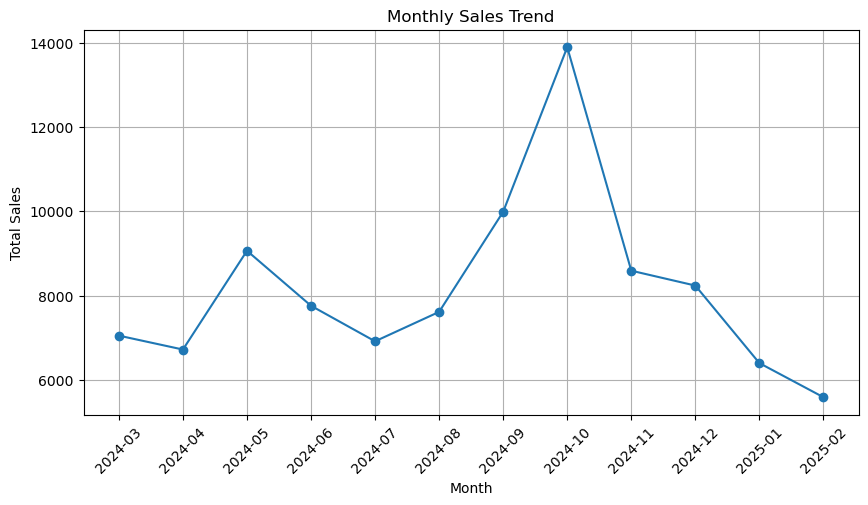

In [14]:
# Visualize Monthly Sales
plt.figure(figsize=(10,5))
plt.plot(monthly_sales['year_month'].astype(str), monthly_sales['money'], marker='o', linestyle='-')
plt.xticks(rotation=45)
plt.xlabel("Month")
plt.ylabel("Total Sales")
plt.title("Monthly Sales Trend")
plt.grid(True)
plt.show()

**Payment Method Preferences (Cash vs Card)**

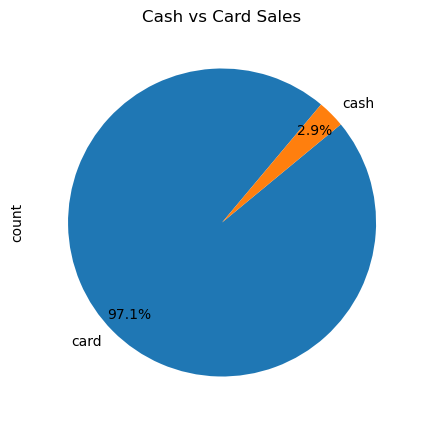

In [16]:
plt.figure(figsize=(5,5))
df['cash_type'].value_counts().plot(kind='pie', autopct='%1.1f%%',startangle=50,
    pctdistance=.85,  # Moves percentage values outward
    labeldistance=1.1,  # Moves labels outward
    title="Cash vs Card Sales")
plt.show()

**Customers Loyality**

<Axes: title={'center': 'Loyal Customers'}, xlabel='Card ID'>

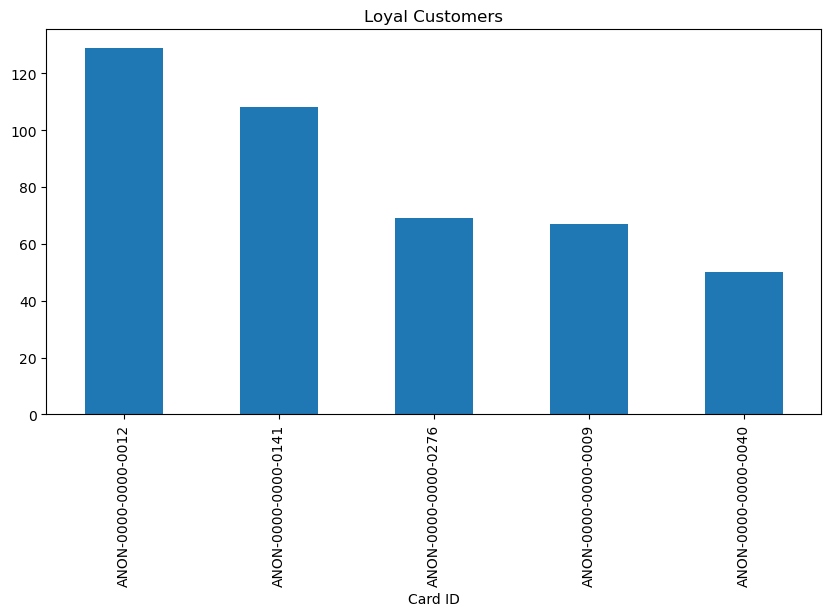

In [17]:
plt.figure(figsize=(10,5))
df['card'].value_counts().head(5).plot(kind='bar', title="Loyal Customers", xlabel="Card ID")

* **Peak Sales Analysis (Best Selling Time of Day)**

C:\Users\Saurabh\AppData\Local\Temp\ipykernel_69872\8052933.py:1: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  df['hour'] = pd.to_datetime(df['time']).dt.hour  # Extract hour from time column


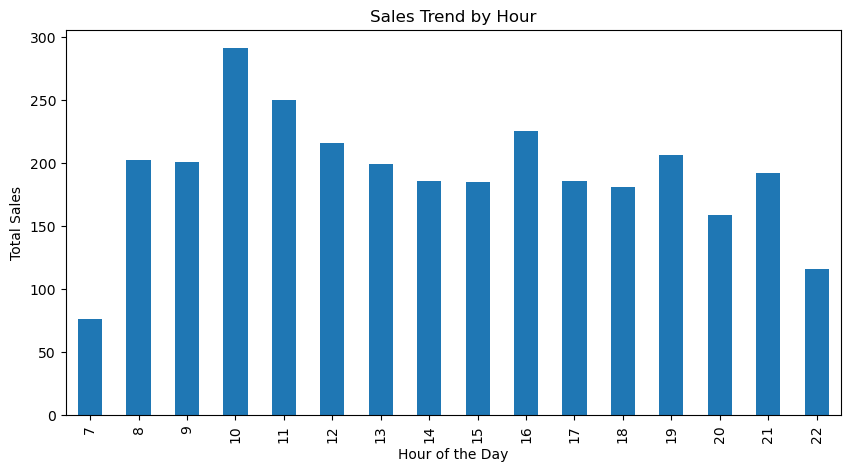

In [18]:
df['hour'] = pd.to_datetime(df['time']).dt.hour  # Extract hour from time column

# Group by hour and sum sales
hourly_sales = df.groupby('hour')['coffee_name'].count()

plt.figure(figsize=(10, 5))
hourly_sales.plot(kind='bar')
plt.xlabel("Hour of the Day")
plt.ylabel("Total Sales")
plt.title("Sales Trend by Hour")
plt.show()

* **Coffee Category Analysis**

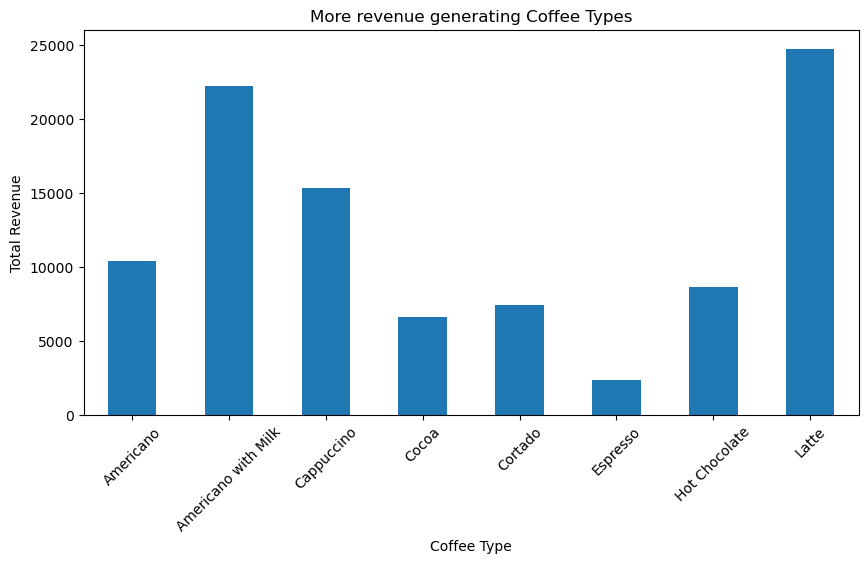

In [19]:
coffee_sales = df.groupby('coffee_name')['money'].sum()

plt.figure(figsize=(10, 5))
coffee_sales.head(10).plot(kind='bar')
plt.xlabel("Coffee Type")
plt.ylabel("Total Revenue")
plt.title("More revenue generating Coffee Types")
plt.xticks(rotation=45)
plt.show()

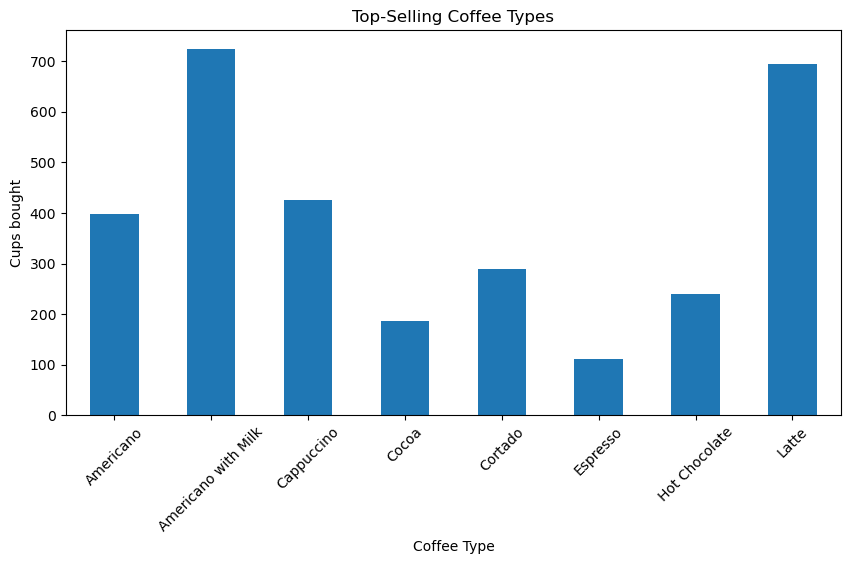

In [20]:
coffee_sales = df.groupby('coffee_name')['money'].count()

plt.figure(figsize=(10, 5))
coffee_sales.head(10).plot(kind='bar')
plt.xlabel("Coffee Type")
plt.ylabel("Cups bought")
plt.title("Top-Selling Coffee Types")
plt.xticks(rotation=45)
plt.show()

* **Finding the Best Day for Promotions**

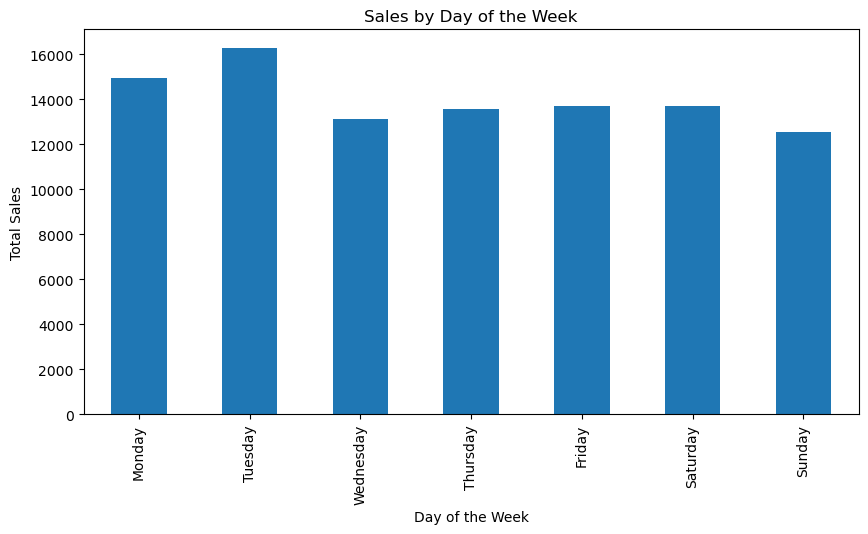

In [21]:
df['day_of_week'] = df['date'].dt.day_name()  # Extract day of the week

# Group by day and sum sales
day_sales = df.groupby('day_of_week')['money'].sum()

# Sort by sales
day_sales = day_sales.reindex(["Monday", "Tuesday", "Wednesday", "Thursday", "Friday", "Saturday", "Sunday"])

# Plot
plt.figure(figsize=(10,5))
day_sales.plot(kind='bar')
plt.xlabel("Day of the Week")
plt.ylabel("Total Sales")
plt.title("Sales by Day of the Week")
plt.show()

# Thank you 